In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
L = 256
img = plt.imread('lion.jpg')[:,:,0]

In [3]:
def show(img, func, normalize=True):
    vect_func = np.vectorize(func)
    new_img = vect_func(img)
    _, ax = plt.subplots(1, 3, figsize=(16,4))
    
    ax[0].set_title('original')
    ax[0].axis('off')
    ax[0].imshow(img, cmap='grey', vmin=0, vmax=L-1)
    
    ax[1].set_title(func.__name__)
    ax[1].axis('off')
    if normalize:
        ax[1].imshow(new_img, cmap='grey')
    else:
        ax[1].imshow(new_img, cmap='grey', vmin=0, vmax=L-1)

    r = np.arange(L, dtype=float)
    s = vect_func(r)
    # plt.axis([0, L-1, 0, L-1])
    ax[2].plot(r, s)

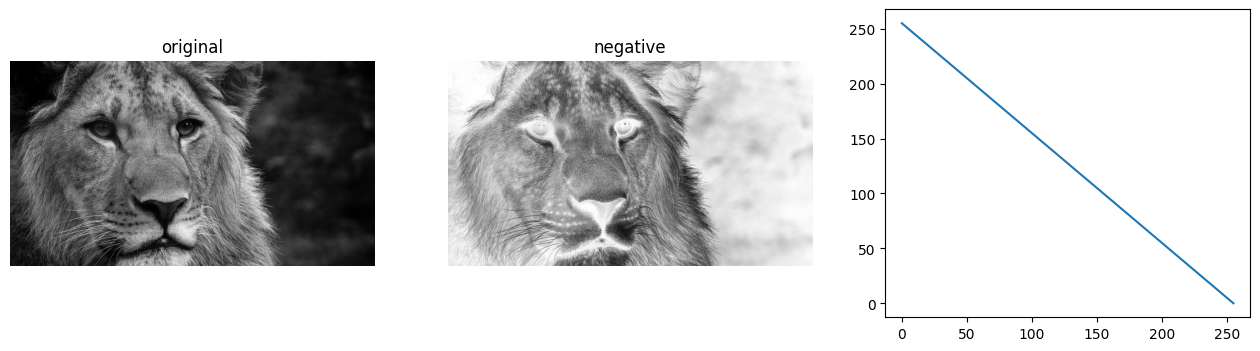

In [4]:
def negative(r):
    return (L-1) - r
show(img, negative)

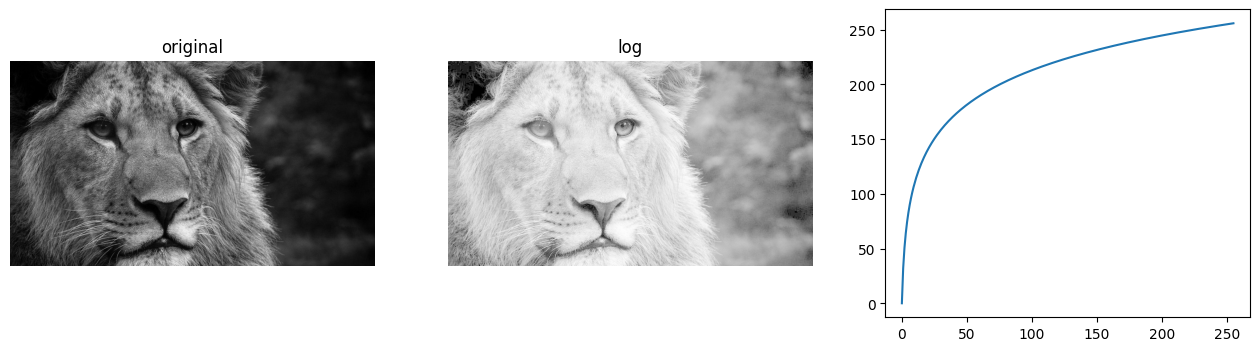

In [5]:
c = L/np.log(1+L)
def log(r):
    return c * np.log(r+1)
show(img, log, False)

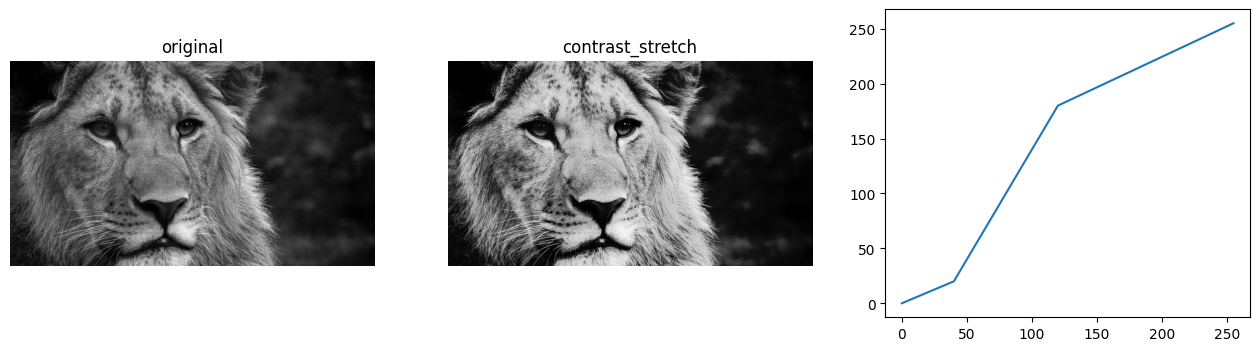

In [9]:
r1, r2 = 40, 120
s1, s2 = 20, 180
a, b, c = s1/r1, (s2-s1)/(r2-r1), (L-1-s2)/(L-1-r2)
def contrast_stretch(r):
    if r < r1:
        return a * r
    elif r < r2:
        return b * (r-r1) + s1
    else:
        return c * (r-r2) + s2
show(img, contrast_stretch, False)

<BarContainer object of 255 artists>

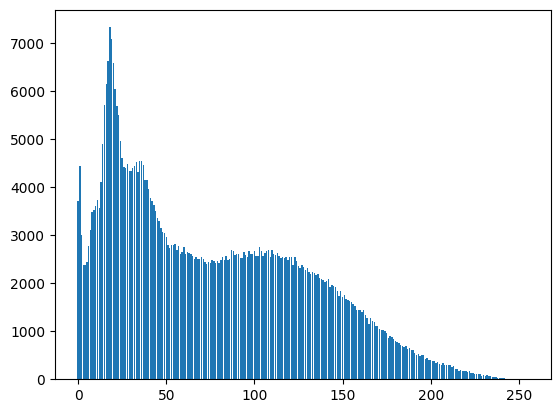

In [7]:
plt.bar(*np.unique(img, return_counts=True))